#  Uber Ride Data Analysis Project

###  Objective:
Analyze ride request patterns by time, location, and trip status to identify service gaps, peak demand times, and opportunities to improve Uber's scheduling and efficiency.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

##  Step 2: Load the Dataset

In [2]:
df = pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


##  Step 3: Clean and Convert Timestamps

In [3]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

df.dropna(subset=['Request timestamp', 'Pickup point', 'Status'], inplace=True)

##  Step 4: Feature Engineering - Extract Time Components

In [4]:
df['Hour'] = df['Request timestamp'].dt.hour
df['Date'] = df['Request timestamp'].dt.date
df['Day of Week'] = df['Request timestamp'].dt.day_name()

def get_time_slot(hour):
    if 5 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time Slot'] = df['Hour'].apply(get_time_slot)

##  Step 5: Exploratory Data Analysis

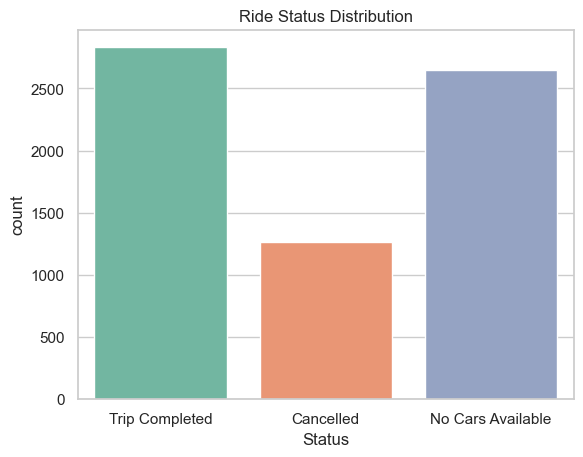

In [5]:
sns.countplot(x='Status', hue='Status', data=df, palette='Set2', legend=False)
plt.title("Ride Status Distribution")
plt.show()

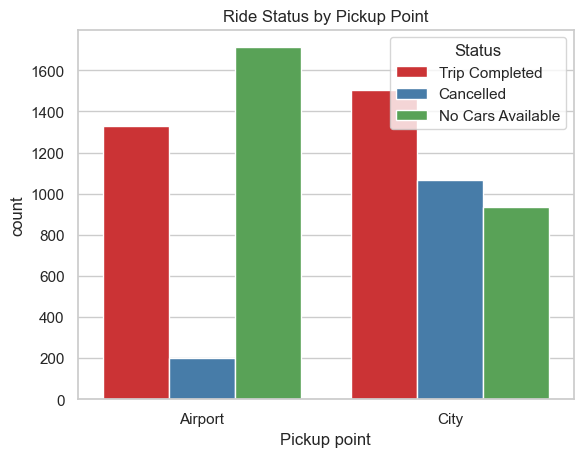

In [6]:
sns.countplot(x='Pickup point', hue='Status', data=df, palette='Set1')
plt.title("Ride Status by Pickup Point")
plt.show()

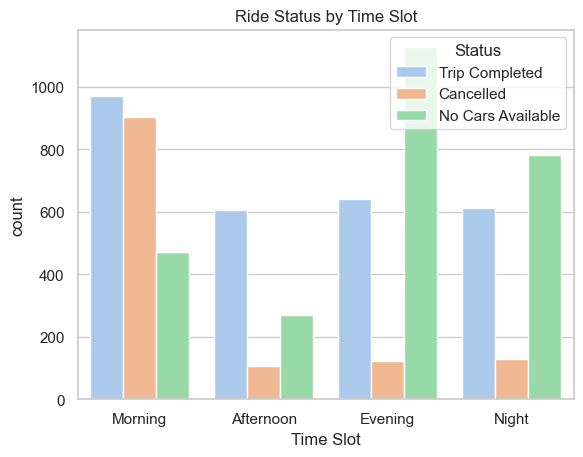

In [7]:
sns.countplot(x='Time Slot', hue='Status', data=df, palette='pastel', 
              order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Ride Status by Time Slot")
plt.show()

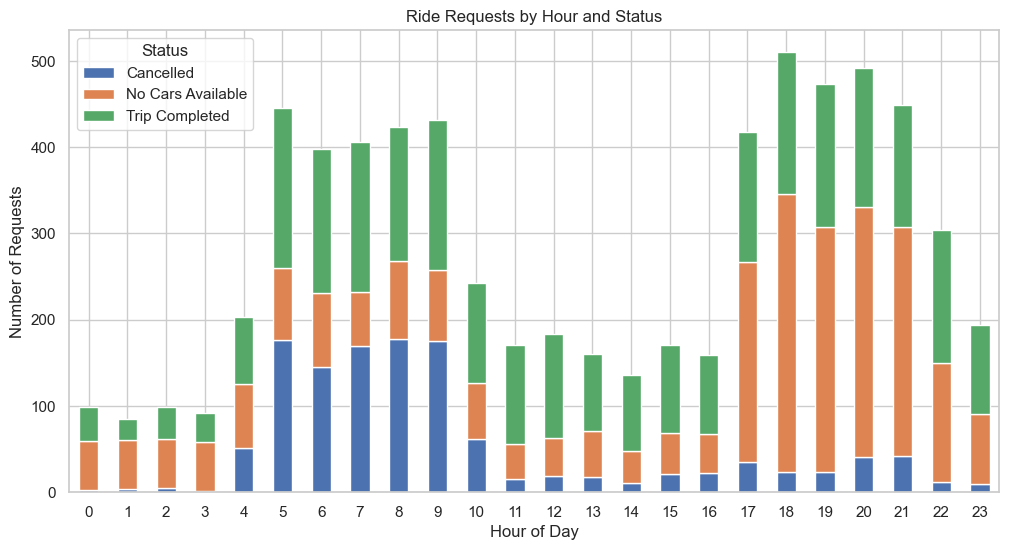

In [8]:
requests_by_hour = df.groupby(['Hour', 'Status']).size().unstack().fillna(0)

requests_by_hour.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Ride Requests by Hour and Status")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.show()

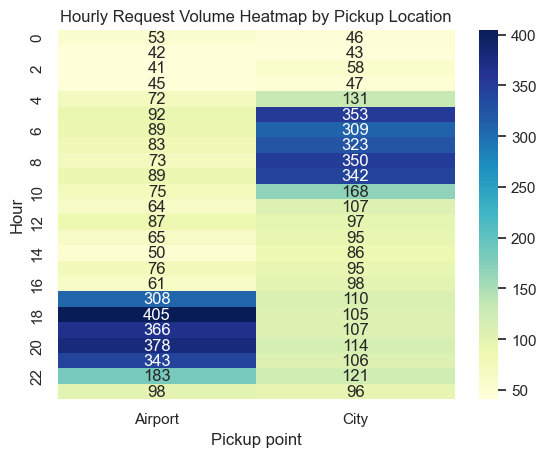

In [9]:
pivot = df.pivot_table(index='Hour', columns='Pickup point', values='Request id', aggfunc='count')
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Hourly Request Volume Heatmap by Pickup Location")
plt.show()

##  Step 6: Key Insights & Suggestions

###  Insights:
- **Morning hours (7–9 AM)** show high ride demand and high **cancellation rates**, especially for pickups from the **City to Airport**.
- **Evening hours (5–8 PM)** show a spike in **'No Cars Available'**, particularly for pickups from the **Airport**.
- **Drop timestamps are mostly missing** for rides that were either **Cancelled** or had **No Cars Available**, confirming they represent incomplete trips.

###  Suggestions:
- **Increase driver availability** during morning peak hours (7–9 AM) from City to Airport.
- **Ensure sufficient driver supply** at the Airport during evening hours (5–8 PM) to reduce unavailability.
- **Incentivize drivers** with flexible pricing or bonuses during high-demand slots.
- **Use historical demand data to forecast peak zones and hours**, and reposition drivers in advance.


In [11]:
requests_by_hour = df.groupby(['Hour', 'Status']).size().unstack().fillna(0)

NameError: name 'request_by_hour' is not defined